<a href="https://colab.research.google.com/github/Iman6243/AI/blob/main/regressionS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clear All Variables

In [239]:
%reset -f
#del my_variable

## Runnig Packages

In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression
from numpy import array
from scipy.stats import pearsonr

## Read Data

In [241]:
data=pd.read_csv("Data_Injury_Prevention.csv")
data.head(2)

,ID,Age,Height,Mass,Team,Position,Years of Football Experience,"Previous Injuries (1=yes, 0=no)",Number of Injuries,"Ankle Injuries (1= yes, 0=no)",...,Importance Injury Prevention,"Knowledgeability (1=yes, 2=no)","Prevention Measure Stretching (1=yes, 0=no)","Prevention Measure Warm Up (1=yes, 0=no)","Prevention Measure Specific Strength Exercises (1=yes, 0=no)","Prevention Measure Bracing (1=yes, 0=no)","Prevention Measure Taping (1=yes, 0=no)","Prevention Measure Shoe Insoles (1=yes, 0=no)","Prevention Measure Face Masks (1=yes, 0=no)","Prevention Measure Medical Corset (1=yes, 0=no)"
0,146.0,19.0,173.0,67.6,1.0,3.0,1.0,1.0,6.0,1.0,...,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,155.0,22.0,179.5,71.0,1.0,3.0,1.0,1.0,2.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [242]:
data.tail(2)

,ID,Age,Height,Mass,Team,Position,Years of Football Experience,"Previous Injuries (1=yes, 0=no)",Number of Injuries,"Ankle Injuries (1= yes, 0=no)",...,Importance Injury Prevention,"Knowledgeability (1=yes, 2=no)","Prevention Measure Stretching (1=yes, 0=no)","Prevention Measure Warm Up (1=yes, 0=no)","Prevention Measure Specific Strength Exercises (1=yes, 0=no)","Prevention Measure Bracing (1=yes, 0=no)","Prevention Measure Taping (1=yes, 0=no)","Prevention Measure Shoe Insoles (1=yes, 0=no)","Prevention Measure Face Masks (1=yes, 0=no)","Prevention Measure Medical Corset (1=yes, 0=no)"
137,36.0,13.0,153.0,44.3,6.0,2.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
138,37.0,13.0,161.0,48.6,6.0,3.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Drawing Data Plot

In [243]:
plt.figure(figsize=(10,10))
data['Knee Injuries (1=yes, 0=no)'].value_counts()

,count
"Knee Injuries (1=yes, 0=no)",
0.0,79
1.0,60


<Figure size 1000x1000 with 0 Axes>

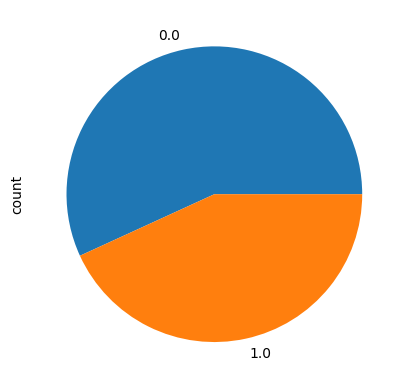

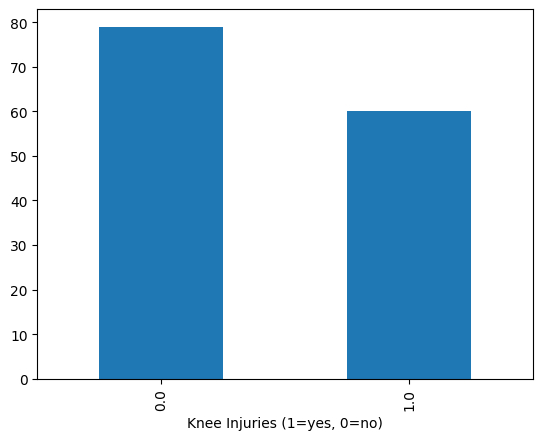

In [244]:
data['Knee Injuries (1=yes, 0=no)'].value_counts().plot(kind='pie')
plt.show()
data['Knee Injuries (1=yes, 0=no)'].value_counts().plot(kind='bar')
plt.show()

<Axes: xlabel='Team', ylabel='Mass'>

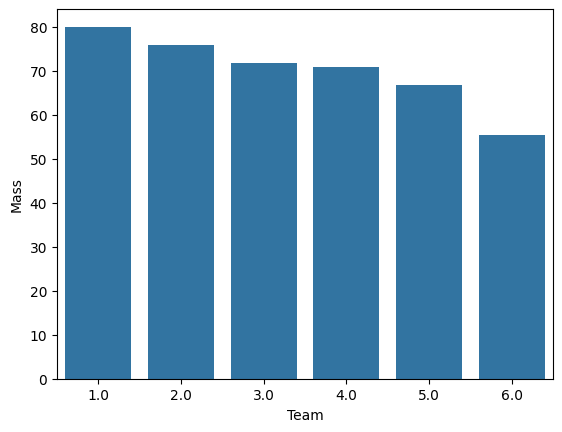

In [245]:
mean_Mass=data.groupby("Team")["Mass"].mean().reset_index()
mean_Mass1=pd.DataFrame(mean_Mass)
sns.barplot(data=mean_Mass1, x="Team", y="Mass")

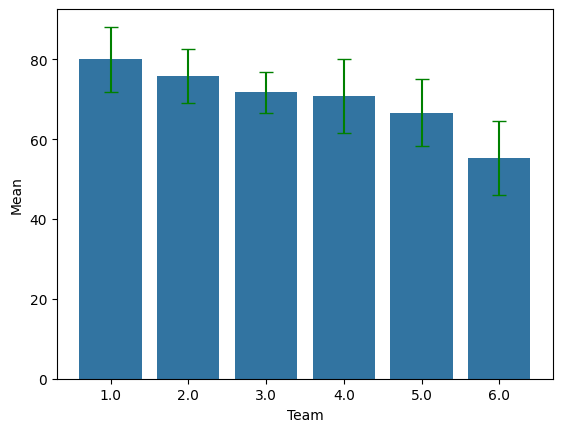

In [246]:
mean_std_Mass = data.groupby("Team")["Mass"].agg(Mean="mean", Std="std").reset_index()
mean_std_Mass1=pd.DataFrame(mean_std_Mass)
sns.barplot(data=mean_std_Mass1, x="Team", y="Mean")
for index, row in mean_std_Mass1.iterrows():
    plt.errorbar(x=index, y=row["Mean"], yerr=row["Std"], fmt='none', capsize=5, color="green")

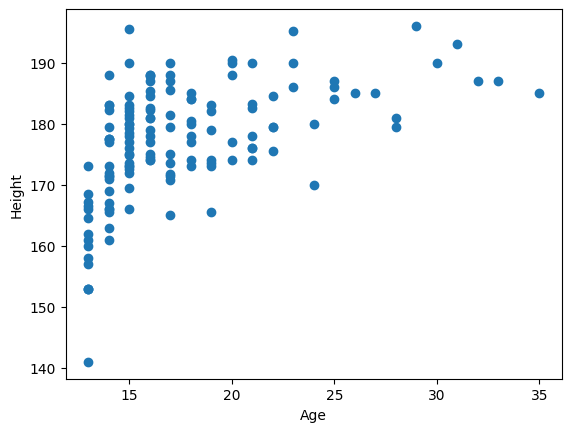

In [247]:
plt.scatter(data.Age, data.Height)
plt.xlabel("Age")
plt.ylabel("Height", fontsize=10)
plt.show()

<Axes: xlabel='Age', ylabel='Height'>

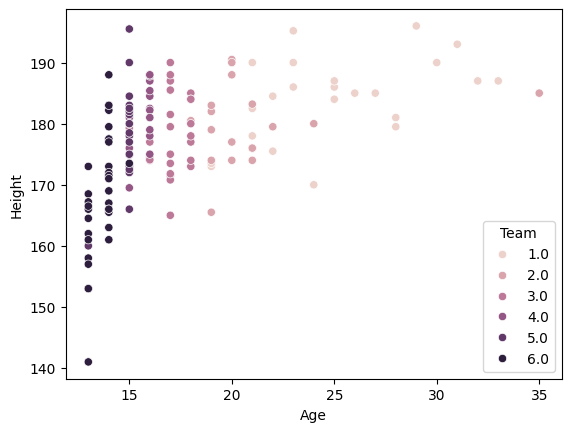

In [248]:
sns.scatterplot(x="Age", y="Height", hue="Team", data=data)

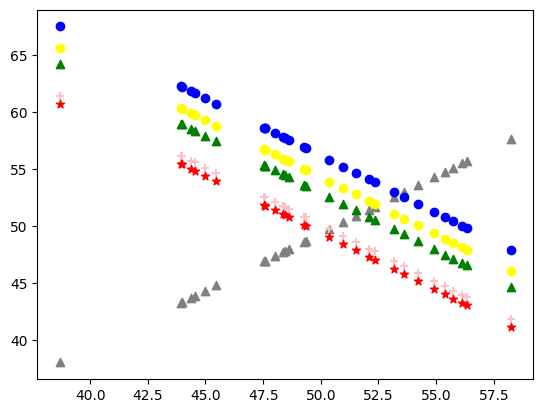

In [249]:
x1=np.random.normal(50,4,30)
y1=x1+np.random.normal(0,5.30)
y2=100-x1+np.random.normal(0,5.30)
y3=100-x1+np.random.normal(0,5.30)
y4=100-x1+np.random.normal(0,5.30)
y5=100-x1+np.random.normal(0,5.30)
y6=100-x1+np.random.normal(0,5.30)
plt.scatter(x1, y1, color="gray", marker='^')
plt.scatter(x1, y2, color="pink", marker='+')
plt.scatter(x1, y3, color="red", marker='*')
plt.scatter(x1, y4, color="green", marker='^')
plt.scatter(x1, y5, color="blue")
plt.scatter(x1, y6, color="yellow")

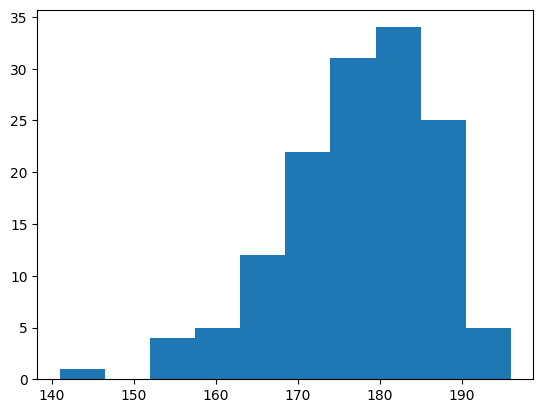

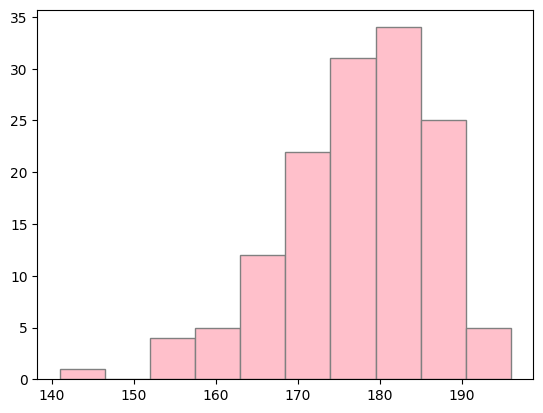

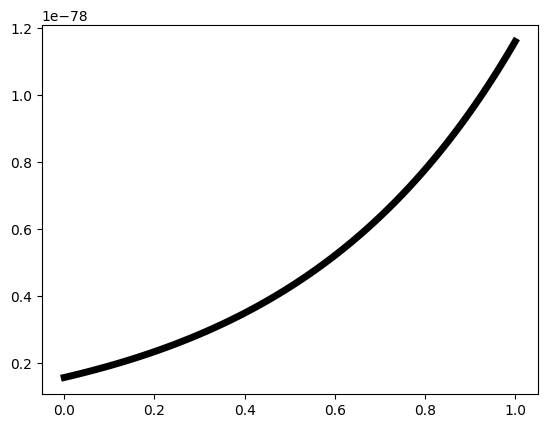

In [250]:
#scipy.stats import norm
plt.hist(data.Height)
mu, std = norm.fit(data.Height)
plt.hist(data.Height, bins=10, density=True)
plt.show()
plt.hist(data.Height, color = "pink", edgecolor = 'gray')
plt.show()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=5, label='Normal Fit')
plt.show()

# Regression

## Reneming Columns

In [251]:
data=data.rename(columns={'Risk Factor Fatigue (1=yes, 0=no)': 'Fatigue', 'Previous Injuries (1=yes, 0=no)': 'Previous Injuries', 'Ankle Injuries (1= yes, 0=no)': 'Ankle Injuries'})
data.head(2)

,ID,Age,Height,Mass,Team,Position,Years of Football Experience,Previous Injuries,Number of Injuries,Ankle Injuries,...,Importance Injury Prevention,"Knowledgeability (1=yes, 2=no)","Prevention Measure Stretching (1=yes, 0=no)","Prevention Measure Warm Up (1=yes, 0=no)","Prevention Measure Specific Strength Exercises (1=yes, 0=no)","Prevention Measure Bracing (1=yes, 0=no)","Prevention Measure Taping (1=yes, 0=no)","Prevention Measure Shoe Insoles (1=yes, 0=no)","Prevention Measure Face Masks (1=yes, 0=no)","Prevention Measure Medical Corset (1=yes, 0=no)"
0,146.0,19.0,173.0,67.6,1.0,3.0,1.0,1.0,6.0,1.0,...,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,155.0,22.0,179.5,71.0,1.0,3.0,1.0,1.0,2.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Writen Simple Regression

In [252]:
X= data['Age']
X
Y= data['Mass']
Y
n=len(Y)
n

X_bar = np.mean(X)
X_bar
Y_bar = np.mean(Y)
Y_bar
n*X_bar*Y_bar

numerator = np.sum(X  * Y )- n*X_bar*Y_bar
denominator = np.sum(X**2)- n*X_bar**2

beta_hat_1 = numerator / denominator
beta_hat_0= Y_bar - beta_hat_1 * X_bar
print("""the regression equation is:\n\t\t\t""", "Y=",beta_hat_0, "+", beta_hat_1,"*X" )
print("""the regression equation  between Age and Mass is:\n\t\t\t""", "Mass=",beta_hat_0, "+", beta_hat_1,"*Age" )

the regression equation is:
			 Y= 37.902534968479436 + 1.7498150610716923 *X
the regression equation  between Age and Mass is:
			 Mass= 37.902534968479436 + 1.7498150610716923 *Age


## Packed Simple regression

In [253]:
df=pd.DataFrame(data)
df.head(3)

x = df[['Age']]
y =df['Mass']
reg_model = LinearRegression()
reg_model.fit(x, y)

beta_hat_1 = reg_model.coef_
beta_hat1_0 = reg_model.intercept_

print("""the regression equation is:\n\t\t\t\t""", "Mass=",beta_hat1_0, "+", beta_hat_1,"*Age" )


the regression equation is:
				 Mass= 37.90253496847913 + [1.74981506] *Age


## Writen Simple Regression By inverse Matrix

In [254]:
features = ['Fatigue', 'Previous Injuries', 'Number of Injuries','Ankle Injuries']
data= data[features]
X= data['Fatigue']
#X1= data['Previous Injuries']
Y= data['Number of Injuries']

#X= X.reshape((len(X), 1))
X = X.values.reshape((len(data), 1))
X.shape

X= np.hstack((np.ones((X.shape[0], 1)), X))
X.shape

B=inv(X.T.dot(X)).dot(X.T).dot(Y)
print(B)

print("""the regression equation is:\n\t\t\t""", "Y=", B[0], "+", B[1], "*X")
# پیش‌بینی Y بر اساس X
yhat = X.dot(B)
corr = pearsonr(yhat, y)
print("""the Pearson's correlation between two variables is:\n\t\t\t""", corr)

[1.59302326 0.82207108]
the regression equation is:
			 Y= 1.5930232558139539 + 0.8220710838086875 *X
the Pearson's correlation between two variables is:
			 PearsonRResult(statistic=0.14417702040118419, pvalue=0.0903924226501317)


## Drawing Regression Plot

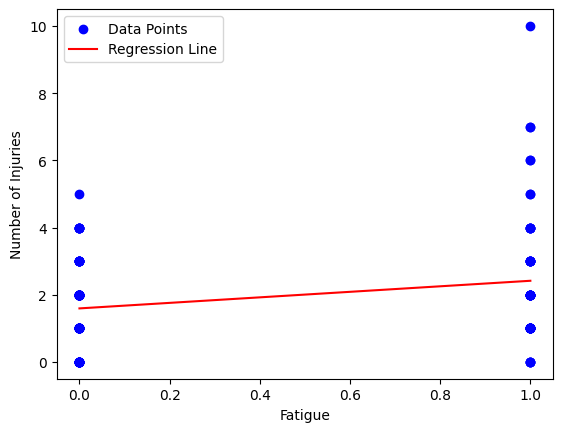

In [255]:
# ترسیم نمودار پراکندگی و خط رگرسیون
plt.scatter(data['Fatigue'], data['Number of Injuries'], color='blue', label='Data Points')
plt.plot(data['Fatigue'], yhat, color='red', label='Regression Line')
plt.xlabel('Fatigue')
plt.ylabel('Number of Injuries')
plt.legend()
plt.show()

## Writen Multiple Regression By inverse Matrix

In [256]:
features = ['Fatigue', 'Previous Injuries', 'Number of Injuries','Ankle Injuries']
data1= data[features]

# تبدیل DataFrame به آرایه‌ی Numpy
np_array = data1.values

X, Y = np_array[:,0:2], np_array[:,2]
X = np.hstack((np.ones((X.shape[0], 1)), X))
X.shape

B = inv(X.T.dot(X)).dot(X.T).dot(Y)
print(B)

print("""the regression equation is:\n\t\t\t""", "AnkleInjuries=",B[0], "+", B[1],"*Fatigue",'+', B[2], "*Previous Injuries" )

yhat = X.dot(B)
# calculate the Pearson's correlation between two variables
corr = pearsonr(yhat, Y)
print("""the Pearson's correlation between two variables is:\n\t\t\t""", corr)

[-0.09744518  0.53594851  2.13794538]
the regression equation is:
			 AnkleInjuries= -0.09744518402506185 + 0.5359485121378227 *Fatigue + 2.137945379796398 *Previous Injuries
the Pearson's correlation between two variables is:
			 PearsonRResult(statistic=0.5379503087432268, pvalue=8.538931940621852e-12)


## Packed Multiple regression

In [257]:
features = ['Fatigue', 'Previous Injuries', 'Number of Injuries','Ankle Injuries']
data2= data[features]

x = data2[['Fatigue', 'Previous Injuries']] #PREDICTOR
y =data2['Ankle Injuries']# DEPENDENT

reg_model = LinearRegression()
reg_model.fit(x, y)

beta_hat1 = reg_model.coef_
alpha_hat1 = reg_model.intercept_

print(""""the regression equation is:\n\t\t\t""", "y=",alpha_hat1, "+", beta_hat1[0],"* x1 +",beta_hat1[1],"* x2" )


"the regression equation is:
			 y= 0.10385669537979653 + -0.0712118245888801 * x1 + 0.5157106499608456 * x2


## Predicting New Data

In [258]:
data_new = array([
	[0.05, 6, 0.02],
	[0.11, 4,  0.5],
  [0.45, 8,  0.05]])

x_new=data_new[:,0:2]
y_new=data_new[:,2]

y_hat=reg_model.predict(x_new)
ss_test=np.sum((y_new-y_hat)**2)
print("""The SS Error between two variables is: """, ss_test)

corr = pearsonr(y_hat, y_new)
print("""The Pearson's correlation between two variables is: """, corr)

The SS Error between two variables is:  30.03139543758376
The Pearson's correlation between two variables is:  PearsonRResult(statistic=-0.841827281593178, pvalue=0.3629601994575736)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
